source: https://www.webpages.uidaho.edu/vakanski/Multispectral_Images_Dataset.html

- The dataset contains aerial agricultural images of a potato field with manual labels of healthy and stressed plant regions. 
- The images were collected with a Parrot Sequoia multispectral camera carried by a 3DR Solo drone flying at an altitude of 3 meters. 
- The dataset consists of RGB images with a resolution of 750×750 pixels, and spectral monochrome red (660 nm), green (550 nm), red-edge (735 nm), and near-infrared (790 nm) images with a resolution of 416×416 pixels, and XML files with annotated bounding boxes of healthy and stressed potato crop.
    - Camera specs: https://www.parrot.com/assets/s3fs-public/2021-09/sequoia-userguide-en-fr-es-de-it-pt-ar-zn-zh-jp-ko_0.pdf

![electro-spectrum](../assets/electromagnetic_spectrum.png)
![parrotseq-specs](../assets/parrotseq_specs.png)

In [8]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Initial look at images

Text(0.5, 1.0, 'Red Edge Band')

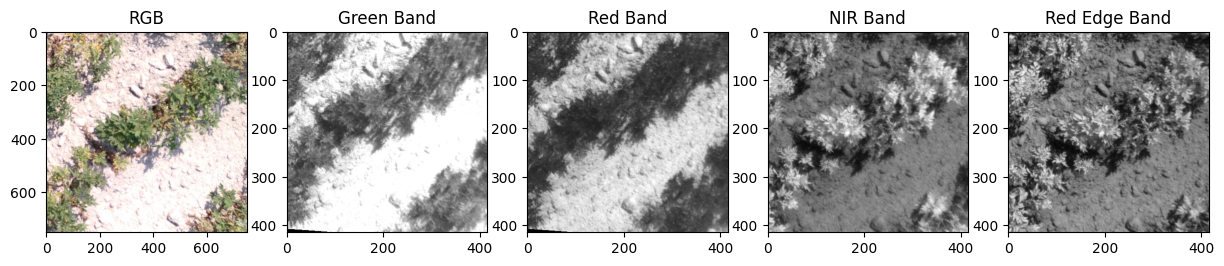

In [9]:
# lets look at the rgb image first
path_to_rgb = "/data2/eranario/data/Multispectral-Potato/Dataset/RGB_Images/Train_Images/Image_030.jpg"
path_to_green = "/data2/eranario/data/Multispectral-Potato/Dataset/Spectral_Images/Green_Channel/Train_Images/Image_030.jpg"
path_to_red = "/data2/eranario/data/Multispectral-Potato/Dataset/Spectral_Images/Red_Channel/Train_Images/Image_030.jpg"
path_to_nir = "/data2/eranario/data/Multispectral-Potato/Dataset/Spectral_Images/Near_Infrared_Channel/Train_Images/Image_030.jpg"
path_to_red_edge = "/data2/eranario/data/Multispectral-Potato/Dataset/Spectral_Images/Red_Edge_Channel/Train_Images/Image_030.jpg"

rgb_im = cv2.imread(path_to_rgb)
rgb_im = cv2.cvtColor(rgb_im, cv2.COLOR_BGR2RGB)

green_im = cv2.imread(path_to_green, cv2.IMREAD_GRAYSCALE)
red_im = cv2.imread(path_to_red, cv2.IMREAD_GRAYSCALE)
nir_im = cv2.imread(path_to_nir, cv2.IMREAD_GRAYSCALE)
red_edge_im = cv2.imread(path_to_red_edge, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15,8))

plt.subplot(1, 5, 1)
plt.imshow(rgb_im)
plt.title("RGB")

plt.subplot(1, 5, 2)
plt.imshow(green_im, cmap='gray')
plt.title("Green Band")

plt.subplot(1, 5, 3)
plt.imshow(red_im, cmap='gray')
plt.title("Red Band")

plt.subplot(1, 5, 4)
plt.imshow(nir_im, cmap='gray')
plt.title("NIR Band")

plt.subplot(1, 5, 5)
plt.imshow(red_edge_im, cmap="gray")
plt.title("Red Edge Band")

# Align Images

We can use opencv ORB to align based on image features. Here is an example to do that:

In [10]:
# resize rgb image to match spectral band images resolution
height, width = green_im.shape
rgb_im_resized = cv2.resize(rgb_im, (width, height), interpolation=cv2.INTER_LINEAR)

In [11]:
rgb_im_resized.shape

(416, 416, 3)

In [ ]:
# function to align images
def align_images(base_img, img_to_align): #1
    sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img_to_align, None)
    kp2, des2 = sift.detectAndCompute(base_img, None)

    matcher = cv2.FlannBasedMatcher()
    matches = matcher.knnMatch(des1, des2, k=2)

    # Filter good matches
    good = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
                good.append(m)

    # Estimate homography
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
    H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # Warp image
    aligned_img = cv2.warpPerspective(img_to_align, H, (base_img.shape[1], base_img.shape[0]))
    return aligned_img

In [13]:
# align example spectral images
rgb_gray = cv2.cvtColor(rgb_im_resized, cv2.COLOR_RGB2GRAY)

aligned_green = align_images(rgb_gray, green_im)
aligned_red = align_images(rgb_gray, red_im)
aligned_nir = align_images(rgb_gray, nir_im)
aligned_red_edge = align_images(rgb_gray, red_edge_im)

Text(0.5, 1.0, 'Red Edge Band')

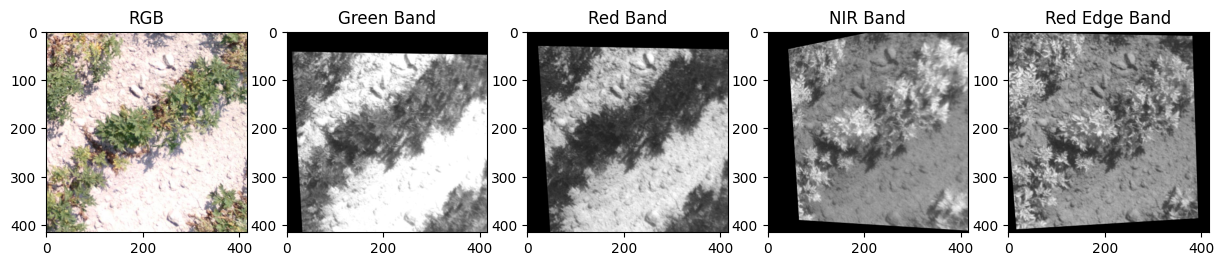

: 

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(1, 5, 1)
plt.imshow(rgb_im_resized)
plt.title("RGB")

plt.subplot(1, 5, 2)
plt.imshow(aligned_green, cmap='gray')
plt.title("Green Band")

plt.subplot(1, 5, 3)
plt.imshow(aligned_red, cmap='gray')
plt.title("Red Band")

plt.subplot(1, 5, 4)
plt.imshow(aligned_nir, cmap='gray')
plt.title("NIR Band")

plt.subplot(1, 5, 5)
plt.imshow(aligned_red_edge, cmap="gray")
plt.title("Red Edge Band")